In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [2]:
import neattext.functions as nfx

In [3]:
!pip install neattext

In [4]:
df_train = pd.read_csv('./archive/train.txt', delimiter=';', header=None)
df_test = pd.read_csv('./archive/test.txt', delimiter=';', header=None)
df_val = pd.read_csv('./archive/val.txt', delimiter=';', header=None)

In [5]:
df_train

,0,1
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [6]:
df_train.rename(columns={0:'Comment', 1:'Emotion'}, inplace=True)
df_test.rename(columns={0:'Comment', 1:'Emotion'}, inplace=True)
df_val.rename(columns={0:'Comment', 1:'Emotion'}, inplace=True)

In [7]:
df_train['Length'] = df_train['Comment'].apply(lambda x: len(x))

In [8]:
df_train

,Comment,Emotion,Length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [10]:
df_train['Comment'] = df_train['Comment'].apply(nfx.remove_stopwords)
df_train['Comment'] = df_train['Comment'].apply(nfx.remove_special_characters)

In [11]:
features = 'Comment'
target = 'Emotion'

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
pipe_lr = Pipeline(steps= [('cv', CountVectorizer()),
                          ('lr', LogisticRegression())] )

In [14]:
pipe_lr.fit(df_train[features], df_train[target])

/home/daniyal214/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [15]:
pipe_lr.score(df_test[features], df_test[target])

0.886

In [16]:
pipe_lr.predict(['i am really impressed'])

array(['surprise'], dtype=object)

In [17]:
import seaborn as sns

In [18]:
pipe_lr.predict_proba(['i am really impressed'])

array([[0.03624039, 0.0343345 , 0.02467722, 0.00971855, 0.02565534,
        0.86937399]])

In [19]:
pipe_lr.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [20]:
cleaned_df = pd.DataFrame(pipe_lr.predict_proba(['i am really impressed']), columns=pipe_lr.classes_).T.reset_index()
cleaned_df

,index,0
0,anger,0.036240
1,fear,0.034335
2,joy,0.024677
3,love,0.009719
4,sadness,0.025655
5,surprise,0.869374


In [21]:
cleaned_df.columns = ['emotions', 'probability']
cleaned_df

,emotions,probability
0,anger,0.036240
1,fear,0.034335
2,joy,0.024677
3,love,0.009719
4,sadness,0.025655
5,surprise,0.869374


In [24]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


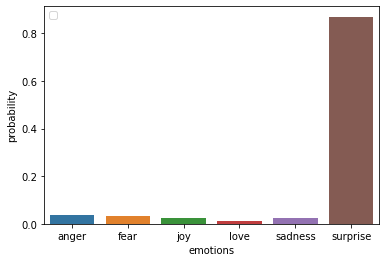

In [26]:
sns.barplot(x='emotions', y='probability', data=cleaned_df)
plt.legend()

In [147]:
import pickle

In [149]:
pickle_out = open('emotion-classifier.pkl', "wb")
pickle.dump(pipe_lr, pickle_out)
pickle_out.close()

In [115]:
parameter_space_LG = {
    'fit_intercept' : [True, False] ,
    'solver' : ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga'] ,
    'max_iter' : [50,100,200]
}

parameter_space_SV  = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'gamma' : ['scale', 'auto'],
    'decision_function_shape' : ['ovo', 'ovr']
}

parameter_space_GB = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : [0.1, 0.01, 0.001, 0.0001],
    'criterion' : ['friedman_mse', 'mse', 'mae'],
    'min_samples_split' : [2, 4, 6],
    'max_depth' : [1, 3, 5],
    'max_features' : ['auto', 'sqrt', 'log2']
}

parameter_space_RF = {
    'criterion' : ["gini", "entropy"],
    'min_samples_split' : [2, 4, 6],
    'max_depth' : [1, 3, 5],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [124]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

In [126]:
logistic_regression_pipeline =Pipeline([   
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('logistic_regression',LogisticRegression())
])
svm_pipeline=Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('svm',SVC())
])
gradient_boost_pipeline=Pipeline([   
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('gradient_boost',GradientBoostingClassifier())
])
random_forest_pipeline=Pipeline([   
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('random_forest',RandomForestClassifier())
])


parameters=[
    {
        'vectorizer__max_features':[500,1000,1500],
        'logistic_regression__fit_intercept' : [True, False] ,
        'logistic_regression__solver' : ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga'] ,
        'logistic_regression__max_iter' : [50,100,200]
    },
    {
        
        'svm__gamma' : ['scale', 'auto'],
        'vectorizer__max_features':[500,1000,1500],
        'svm__C':[1,3,5]
    },
    {
        'vectorizer__max_features':[500,1000,1500],
        'gradient_boost__loss' : ['deviance', 'exponential'],
        'gradient_boost__learning_rate' : [0.1, 0.01, 0.001],
        'gradient_boost__criterion' : ['friedman_mse', 'mse', 'mae'],
        'gradient_boost__max_depth' : [1, 3, 5],
    },
    {
        'vectorizer__max_features':[500,1000,1500],
        'random_forest__criterion' : ["gini", "entropy"],
        'random_forest__max_depth' : [1, 3, 5],
    }
]

model_name = [ 'Logistic Regression', 
              'Support Vector Machine', 'Gradient Boost', 'Random Forest' ]
pipelines=[logistic_regression_pipeline, svm_pipeline, gradient_boost_pipeline, random_forest_pipeline]


for i in range(4):

# gridsearch only for the Random Forest model
    clf =RandomizedSearchCV(pipelines[i],parameters[i],cv=3,n_jobs=-1)
    clf.fit(df_train[features], df_train[target])
    print(f'{model_name[i]}:')
    print("Best parameters:")
    print(clf.best_params_)
    print('')

Logistic Regression:
Best parameters:
{'vectorizer__max_features': 1500, 'logistic_regression__solver': 'lbfgs', 'logistic_regression__max_iter': 200, 'logistic_regression__fit_intercept': False}

Support Vector Machine:
Best parameters:
{'vectorizer__max_features': 1500, 'svm__gamma': 'scale', 'svm__C': 3}



/home/daniyal214/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.33737489        nan        nan 0.4447498  0.33737489
        nan        nan        nan 0.36843729]
  category=UserWarning


Gradient Boost:
Best parameters:
{'vectorizer__max_features': 1000, 'gradient_boost__max_depth': 3, 'gradient_boost__loss': 'deviance', 'gradient_boost__learning_rate': 0.01, 'gradient_boost__criterion': 'mse'}

Random Forest:
Best parameters:
{'vectorizer__max_features': 1500, 'random_forest__max_depth': 5, 'random_forest__criterion': 'gini'}



In [145]:
logistic_regression_pipeline =Pipeline([   
    ('vectorizer',CountVectorizer()),
    ('logistic_regression',LogisticRegression())
])
svm_pipeline=Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english', max_features=1500)),
    ('svm',SVC( gamma='scale', C=3, random_state=123))
])
gradient_boost_pipeline=Pipeline([   
    ('vectorizer',CountVectorizer(stop_words='english', max_features=1000)),
    ('gradient_boost',GradientBoostingClassifier(max_depth=3, loss='deviance', learning_rate=0.01,
                                                criterion='mse', random_state=123))
])
random_forest_pipeline=Pipeline([   
    ('vectorizer',CountVectorizer(stop_words='english', max_features=1500)),
    ('random_forest',RandomForestClassifier(max_depth=5, criterion='gini'))
])


model_name = [ 'Logistic Regression', 
              'Support Vector Machine', 'Gradient Boost', 'Random Forest' ]
pipelines=[logistic_regression_pipeline, svm_pipeline, gradient_boost_pipeline, random_forest_pipeline]

accuracy = []
for i in range(4):
    pipelines[i].fit(df_train[features], df_train[target])
    acc = pipelines[i].score(df_test[features], df_test[target])
    accuracy.append(acc)
    
    
comp = pd.DataFrame({'Model' : model_name, 'Accuracy':accuracy})

/home/daniyal214/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [146]:
comp

,Model,Accuracy
0,Logistic Regression,0.8860
1,Support Vector Machine,0.8570
2,Gradient Boost,0.4515
3,Random Forest,0.3530
